In [102]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer


In [103]:
#Loading data file
CHD = pd.read_csv('D:/College/Semester 5/Breadth - application of Machine learning in biological systems/Assignments/heart_disease_prediction/framingham.csv',
sep= ',', header= 0)

In [104]:
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

numerical_imputer = SimpleImputer(strategy = "mean")
categorical_imputer = SimpleImputer(strategy="most_frequent")

numerical_columns = ["age", "cigsPerDay", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
categorical_columns = ["male", "education", "currentSmoker" , "BPMeds", "prevalentStroke", "prevalentHyp","TenYearCHD"]


transformer = ColumnTransformer([
    ("numerical_imputer" , numerical_imputer , numerical_columns),
    ("categorical_imputer" , categorical_imputer , categorical_columns),
    ])

new = transformer.fit_transform(CHD)
CHDn = pd.DataFrame(new , columns=["age", "cigsPerDay", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose","male", "education", "currentSmoker" , "BPMeds", "prevalentStroke", "prevalentHyp","TenYearCHD",
])

In [105]:
CHDn.head()

age  cigsPerDay  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0  39.0         0.0       0.0    195.0  106.0   70.0  26.97       80.0   
1  46.0         0.0       0.0    250.0  121.0   81.0  28.73       95.0   
2  48.0        20.0       0.0    245.0  127.5   80.0  25.34       75.0   
3  61.0        30.0       0.0    225.0  150.0   95.0  28.58       65.0   
4  46.0        23.0       0.0    285.0  130.0   84.0  23.10       85.0   

   glucose  male  education  currentSmoker  BPMeds  prevalentStroke  \
0     77.0   1.0        4.0            0.0     0.0              0.0   
1     76.0   0.0        2.0            0.0     0.0              0.0   
2     70.0   1.0        1.0            1.0     0.0              0.0   
3    103.0   0.0        3.0            1.0     0.0              0.0   
4     85.0   0.0        3.0            1.0     0.0              0.0   

   prevalentHyp  TenYearCHD  
0           0.0         0.0  
1           0.0         0.0  
2           0.0         0.0  
3           1.0         1.0  
4           0.0         0.0

In [106]:
print ("Dataset Shape:: "), CHDn.shape

Dataset Shape:: 


(None, (4240, 16))

In [107]:
feature_cols = ["male", "age", "education", "currentSmoker", "cigsPerDay", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose",]
X = CHDn[feature_cols] # Features
y = CHDn.TenYearCHD # Target variable

In [108]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 100)

In [109]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [110]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [111]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=5, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

In [112]:
y_pred_en = clf.predict(X_test)
y_pred_en

array([0., 0., 0., ..., 1., 1., 0.])

In [113]:
print ("Accuracy is "), accuracy_score(y_test,y_pred_en)*100

Accuracy is 


(None, 84.02122641509435)

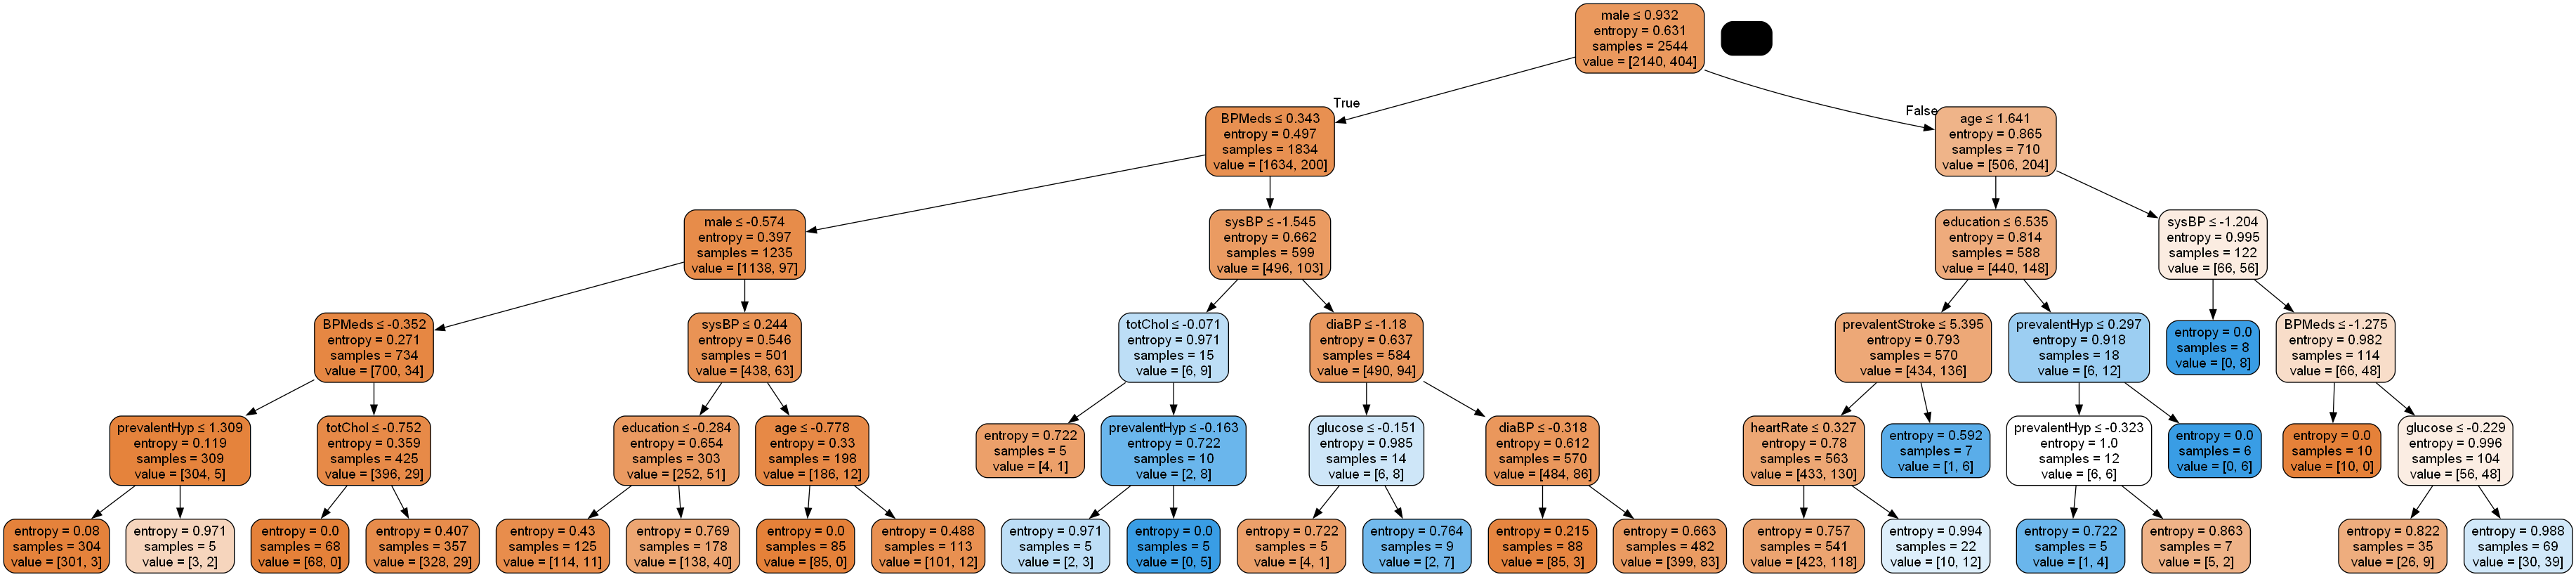

In [114]:
from six import StringIO
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('CHDn.png')
Image(graph.create_png())
